In [1]:
import pandas                   as pd
import seaborn                  as sns
import matplotlib.pyplot        as plt
import matplotlib.colors        as mcolors
import plotly.express           as px
import matplotlib.pyplot        as plt
import os 
import numpy                    as np
from scipy import stats         as ss
import statistics
import scipy.stats              as st
import statsmodels.api          as sm
import statsmodels.formula.api  as smf
from operator import attrgetter
import seaborn                  as sns

In [2]:
# Смотрю путь до файлов
import os
print(os.getcwd())

/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-patran-brk868-0bbd9/My_folder/_FINAL project


                                                    # Задание 1
                                Retention – один из самых важных показателей в компании. 
    Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 

In [3]:
reg_data_df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-patran-brk868-0bbd9/shared/problem1-reg_data.csv") # данные о времени регистрации

In [4]:
reg_data_df.head()

,reg_ts;uid
0,911382223;1
1,932683089;2
2,947802447;3
3,959523541;4
4,969103313;5


In [5]:
# Преобразование, разделение значений на 2 колонки
reg_data_df['reg_ts'] = reg_data_df['reg_ts;uid'].apply(lambda x: x.split(';')[0])
reg_data_df['uid'] = reg_data_df['reg_ts;uid'].apply(lambda x: x.split(';')[1])
reg_data_df.drop(columns=['reg_ts;uid'], inplace=True)

In [6]:
reg_data_df.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [7]:
auth_data_df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-ivan-patran-brk868-0bbd9/shared/problem1-auth_data.csv") # данные о времени захода пользователей в игру

In [8]:
auth_data_df.head()

,auth_ts;uid
0,911382223;1
1,932683089;2
2,932921206;2
3,933393015;2
4,933875379;2


In [9]:
# Преобразование, разделение значений на 2 колонки
auth_data_df['auth_ts'] = auth_data_df['auth_ts;uid'].apply(lambda x: x.split(';')[0])
auth_data_df['uid'] = auth_data_df['auth_ts;uid'].apply(lambda x: x.split(';')[1])
auth_data_df.drop(columns=['auth_ts;uid'], inplace=True)

In [10]:
auth_data_df.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


In [11]:
# Преобразование типов данных (reg_ts и auth_ts)
reg_data_df['reg_ts'] = reg_data_df['reg_ts'].astype(int)
auth_data_df['auth_ts'] = auth_data_df['auth_ts'].astype(int)
reg_data_df['reg_date'] = pd.to_datetime(reg_data_df['reg_ts'], unit='s')
auth_data_df['auth_date'] = pd.to_datetime(auth_data_df['auth_ts'], unit='s')
reg_data_df.drop(columns=['reg_ts'], inplace=True)
auth_data_df.drop(columns=['auth_ts'], inplace=True)

In [12]:
reg_data_df.head()

,uid,reg_date
0,1,1998-11-18 09:43:43
1,2,1999-07-22 22:38:09
2,3,2000-01-13 22:27:27
3,4,2000-05-28 14:19:01
4,5,2000-09-16 11:21:53


In [13]:
auth_data_df.head()

,uid,auth_date
0,1,1998-11-18 09:43:43
1,2,1999-07-22 22:38:09
2,2,1999-07-25 16:46:46
3,2,1999-07-31 03:50:15
4,2,1999-08-05 17:49:39


In [14]:
# Объединение данных 
merged_data = reg_data_df.merge(auth_data_df, on='uid', how='left')

# Расчёт дней с момента регистрации
merged_data['days_since_reg'] = (merged_data['auth_date'] - merged_data['reg_date']).dt.days

In [15]:
merged_data.head(10)

,uid,reg_date,auth_date,days_since_reg
0,1,1998-11-18 09:43:43,1998-11-18 09:43:43,0
1,2,1999-07-22 22:38:09,1999-07-22 22:38:09,0
2,2,1999-07-22 22:38:09,1999-07-25 16:46:46,2
3,2,1999-07-22 22:38:09,1999-07-31 03:50:15,8
4,2,1999-07-22 22:38:09,1999-08-05 17:49:39,13
5,2,1999-07-22 22:38:09,1999-08-11 11:56:55,19
6,2,1999-07-22 22:38:09,1999-08-14 20:30:33,22
7,2,1999-07-22 22:38:09,1999-08-18 18:56:26,26
8,2,1999-07-22 22:38:09,1999-08-20 09:27:12,28
9,2,1999-07-22 22:38:09,1999-08-26 15:52:32,34


In [16]:
merged_data_sort = merged_data.sort_values(by='days_since_reg', ascending=False)
merged_data_sort

,uid,reg_date,auth_date,days_since_reg
1929,2,1999-07-22 22:38:09,2020-09-18 11:24:29,7728
1928,2,1999-07-22 22:38:09,2020-09-16 04:27:12,7726
1927,2,1999-07-22 22:38:09,2020-09-10 10:10:21,7720
1926,2,1999-07-22 22:38:09,2020-09-09 09:06:39,7719
1925,2,1999-07-22 22:38:09,2020-09-05 15:18:24,7715
...,...,...,...,...
7443756,553985,2019-07-28 22:57:52,2019-07-28 22:57:52,0
7443755,553984,2019-07-28 22:56:07,2019-07-28 22:56:07,0
7443754,553983,2019-07-28 22:54:21,2019-07-28 22:54:21,0
7443748,553982,2019-07-28 22:52:36,2019-07-28 22:52:36,0


                                                Retention по дням

In [17]:
# Расчет retention по дням
def calculate_daily_retention(data, max_days=30):
    retention_data = []
    registered_users = data['uid'].nunique()
    for day in range(1, max_days + 1):
        retained_users = data[data['days_since_reg'] == day]['uid'].nunique()
        retention_rate = (retained_users / registered_users) * 100
        retention_data.append({'day': day, 'retention_rate': retention_rate})
    return pd.DataFrame(retention_data)
daily_retention_results = calculate_daily_retention(merged_data, max_days=30)
daily_retention_results.head()

,day,retention_rate
0,1,4.0202
1,2,4.2991
2,3,4.9152
3,4,5.6070
4,5,6.3713


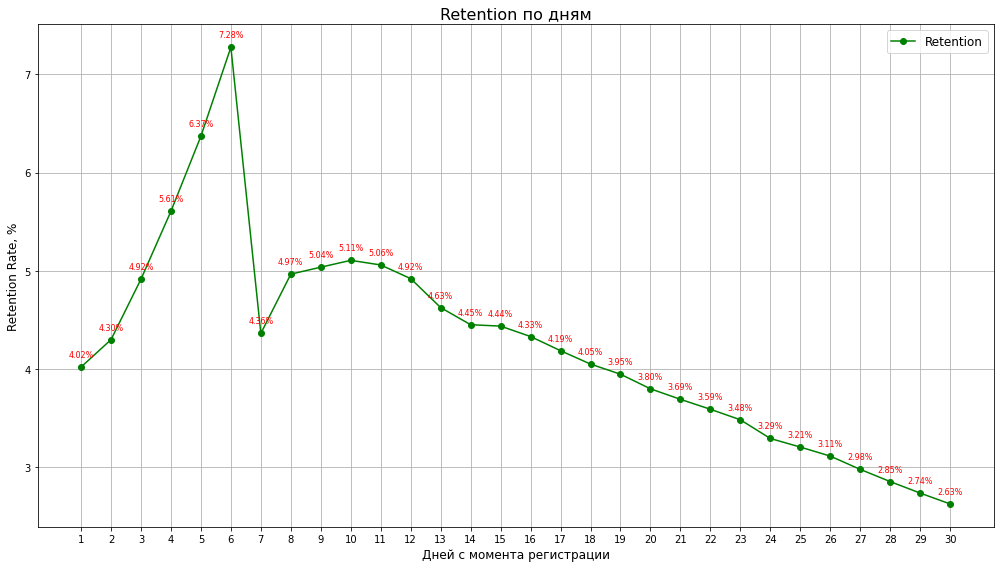

In [37]:
# График
plt.figure(figsize=(14, 8))
plt.plot(daily_retention_results['day'], daily_retention_results['retention_rate'], marker='o', color='g', label='Retention')
plt.title('Retention по дням', fontsize=16)
plt.xlabel('Дней с момента регистрации', fontsize=12)
plt.ylabel('Retention Rate, %', fontsize=12)
plt.grid(True)
plt.xticks(range(1, daily_retention_results['day'].max() + 1))
plt.legend(fontsize=12)
plt.tight_layout()
for i, row in daily_retention_results.iterrows():
    plt.text(row['day'], row['retention_rate'] + 0.1, f"{row['retention_rate']:.2f}%", ha='center', fontsize=8, color='r')
plt.show()

                                            Retention по месяцам (как вариант к рассмотрения)
            Retention по месяцам, так как это мобильная игра и скорее всего имеется ежемесячная подписка 
                                            или иные ежемесячные платные бонусы.

In [19]:
merged_data['months_since_reg'] = ((merged_data['auth_date'].dt.year - merged_data['reg_date'].dt.year) * 12 +
                                   (merged_data['auth_date'].dt.month - merged_data['reg_date'].dt.month))

# Функция для расчета retention по месяцам
def calculate_monthly_retention(data, max_months=12):
    retention_data = []
    registered_users = data['uid'].nunique()
    for month in range(1, max_months + 1):
        retained_users = data[data['months_since_reg'] == month]['uid'].nunique()
        retention_rate = (retained_users / registered_users) * 100
        retention_data.append({'month': month, 'retention_rate': retention_rate})
    return pd.DataFrame(retention_data)

# Retention по месяцам
monthly_retention_results = calculate_monthly_retention(merged_data, max_months=12)

In [20]:
monthly_retention_results

,month,retention_rate
0,1,16.8813
1,2,5.6932
2,3,4.3703
3,4,4.1648
4,5,3.9537
5,6,3.7600
6,7,3.5693
7,8,3.4063
8,9,3.2374
9,10,3.0734


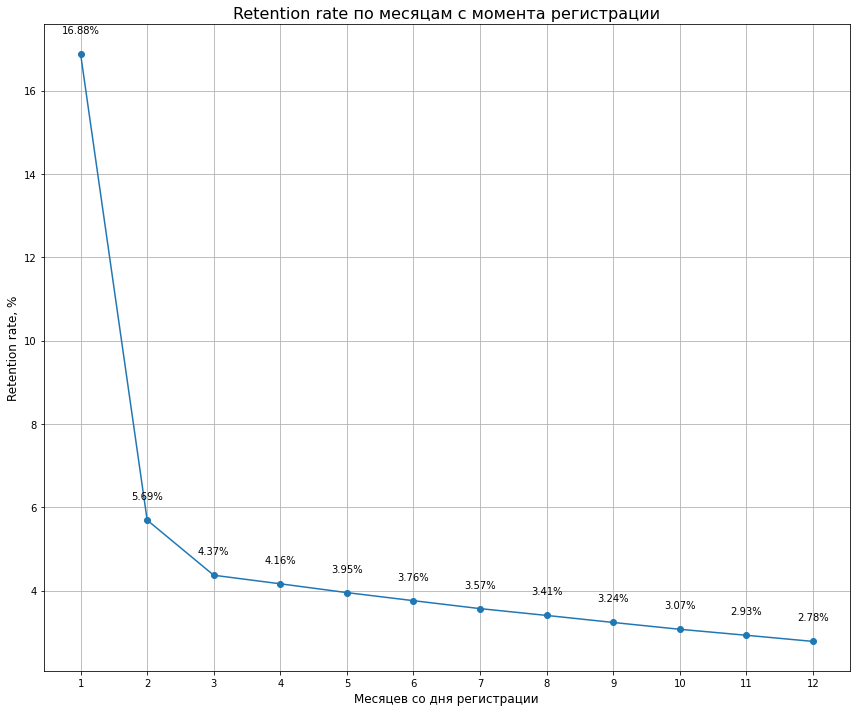

In [21]:
# График
plt.figure(figsize=(12, 10))
plt.plot(monthly_retention_results['month'], monthly_retention_results['retention_rate'], marker='o')
plt.title('Retention rate по месяцам с момента регистрации', fontsize=16)
plt.xlabel('Месяцев со дня регистрации', fontsize=12)
plt.ylabel('Retention rate, %', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
for i, row in monthly_retention_results.iterrows():
    plt.text(row['month'], row['retention_rate'] + 0.5, f"{row['retention_rate']:.2f}%", ha='center', fontsize=10)
plt.show()

                                                    # Задание 2
    Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений.
    Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.
    Какой набор предложений можно считать лучшим? 
    Какие метрики стоит проанализировать для принятия правильного решения и как? 

In [22]:
df = pd.read_csv("Проект_1_Задание_2.csv")

In [23]:
df.head(3)

,user_id;revenue;testgroup
0,1;0;b
1,2;0;a
2,3;0;a


In [24]:
# Преобразование, разделение значений на 3 колонки
df['user_id'] = df['user_id;revenue;testgroup'].apply(lambda x: x.split(';')[0])
df['revenue'] = df['user_id;revenue;testgroup'].apply(lambda x: x.split(';')[1])
df['testgroup'] = df['user_id;revenue;testgroup'].apply(lambda x: x.split(';')[2])
df.drop(columns=['user_id;revenue;testgroup'], inplace=True)

In [25]:
df.head(15)

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
5,6,0,b
6,7,0,b
7,8,0,b
8,9,0,b
9,10,0,a


In [26]:
df.groupby('revenue').head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
403994,403995,2793,b
404161,404162,2316,b
404193,404194,2998,b
404525,404526,3120,b


In [27]:
df['revenue'].dtype

dtype('O')

In [28]:
# Преобразование типа данных
df['revenue'] = df['revenue'].str.strip().astype(float) #

        # ARPU - средний доход с одного пользовтеля
        # CR - процент конверсии в платящего пользователя
        # Total Revenue - общий доход

In [29]:
# Количество пользователей в каждой группе
total_users_a = 202103
total_users_b = 202667

# Количество платящих пользователей
paying_users_a = 1928
paying_users_b = 1805

# CR - процент конверсии в платящего
CR_a = (paying_users_a / total_users_a) * 100
CR_b = (paying_users_b / total_users_b) * 100

In [32]:
print(f"Контрольная группа (A):")
print(f"CR:{CR_a:.2}%")

print(f"Тестовая группа (B):")
print(f"CR:{CR_b:.2f}%")

Контрольная группа (A):
CR:0.95%
Тестовая группа (B):
CR:0.89%


In [33]:
# Рассчитываем Total Revenue для групп A и B
total_revenue_a = df[df['testgroup'] == 'a']['revenue'].sum()
total_revenue_b = df[df['testgroup'] == 'b']['revenue'].sum()

# Вывод результатов
print(f"Total Revenue Контрольная группа (A): {total_revenue_a}")
print(f"Total Revenue Тестовая группа (B): {total_revenue_b}")

Total Revenue Контрольная группа (A): 5136189.0
Total Revenue Тестовая группа (B): 5421603.0


In [34]:
# Разница дохода:
total_revenue_b - total_revenue_a

285414.0

In [35]:
# Проверка о 5%
ARPU_a = total_revenue_a / total_users_a
ARPU_b = total_revenue_b / total_users_b
round(ARPU_b / ARPU_a,2)

1.05

                                        Проверка на стат значимость

In [36]:
revenue_a = df[df['testgroup'] == 'a']['revenue']
revenue_b = df[df['testgroup'] == 'b']['revenue']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(revenue_a, revenue_b)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Различия между группами статистически значимы.")
else:
    print("Различия между группами не являются статистически значимыми.")

T-statistic: -0.6242026493616787
P-value: 0.532494858971837
Различия между группами не являются статистически значимыми.


Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

Выводы:
1. Мы видим, что конверсия в платящего игрока в контрольной группе (группа А) выше, нежели в тестовой группе (группа В) - CR 0.95% и 0.89% соответственно.
2. Средний чек по клиенту (ARPU) в группе В больше на 5%. 
3. Общий доход (Total Revenue) группы В больше и равна 5421603, в группе А = 5136189 (разница 285414).
4. Различия между группами не являются статистически значимыми.

    На данном этапе трудно сказать, какой набор предложений является лучшим. Общий доход тестовой группы больше, несмотря на уменьшенную конвертацию по сравнению с контрольной группой. Однако бОльшая конверсия контрольной группы указывает на то, что игроки чаще покупают предложенные наборы. 
    Если цель увеличить общий доход, то набор предложений для тестовой группы показывает лучшие результаты. Если же цель заключается в увеличении конверсии в платящего пользователя, то предложения для контрольной группы показывают лучший результат.
    
    Для понимания какой из наборов будет лучшим, следут проверить дополнительные метрики - LTV (как изменится прибыль с игрока за время пользованием продукта в рамках двух этих наборов предложений), Retention (как эти два набора предложений повлияют на долгосрочную вовлеченность игроков), стоимость привлечения одного игрока. Возмодно дополнительно следует провести RFM-сегментацию, дабы понять какие наборы и как будут влиять на разные группы.

                                                    # Задание 3
В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

                    1. С помощью каких метрик можно оценить результаты последнего прошедшего события?
        1. DAU/MAU - сколько уникальных пользователей участвовало в событии.
        2. Retantion - сколько число игроков вернулось в игру в момент старта события; процент удержания игроков на период проведения мероприятия.
        3. Конверсия в игру (CR) - сколько игроков играло в событие по отношению к общему числу игроков игры.
        4. Churn rate - сколько игроков ушло после первой миссии события, то есть не продолжили играть (показывает заинтересованность в событии. Смогло ли оно сразу увлечь игроков).
        5. Total Revenue события.
        6. ARPU - повлияло ли событие на средний чек игрока
        7. Сколько игроков закончили тематическое событие.
        8. Среднее число уровней, которое смогли пройти игроки.
        9. Самые сложные уровни, после которых уходило больше всего людей.
        10. Обратная связь игроков - отзывы, рейтинг игры.

                  2. Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?
                  
Данный механизм повлияет на набор метрик, потребуются дополнительно новые метрики для более точной оценки:

1. Среднее количество повторных попыток на уровне.
2. Сколько пользователей откатывалось назад хотя бы раз.
3. Среднее время игрока на уровень.
4. Churn rate false - сколько игроков ушло после первого провала в событии.
5. Затраты на игрока в месяц - есть ощущение, что сообщений в поддержку будет больше из-за увеличивающейся сложности казуальной игры.

Также усложнение игры повлияет на все предыдущие метрики (с примером возможного изменения метрик):
1. DAU/MAU - данное усложнение может как привлечь более хардкорных игроков, так и оттолкнуть казуальных.
2. Retantion
3. Конверсия в игру (CR)
4. Churn rate - для казуальной игры усложнение может изменить показания данной метрики
5. Total Revenue события - есть шанс, что усложнение вынудит прибегать к дополнительным внутриигровым покупкам, так и шанс, что ноборот оттолкнет от такого рода принуждения к покупкам
6. ARPU - также может измениться в связи с новыми покупками из-за усложнения игры
7. Сколько игроков закончили тематическое событие - так как событие ограничено по времени и могут проихсодить откаты, то это также повлияет на данную метрику
8. Среднее число уровней, которое смогли пройти игроки
9. Самые сложные уровни, после которых уходило больше всего людей - возможно данный показатель изменится, если игроков вообще стало забрасывать игру больше, то есть на более ранних этапах игры. 
10. Обратная связь игроков - отзывы, рейтинг игры - трудно сказать как изменится данная метрика. Окажется ли число казуальный игроков, недовольных событием, больше чем хаодкорных или тех, у кого есть различные пропуски/подписки/дополнительные паки. Всё зависит от реализации самого события.

Уверенно сказать как именно повлияет усложнение механики события на итоговый продукт невозможно без рассмотрения в деталях всех метрик и проведении А/В тестирования.